In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('module17/data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.rename(columns = {'y':'deposit'}, inplace = True)


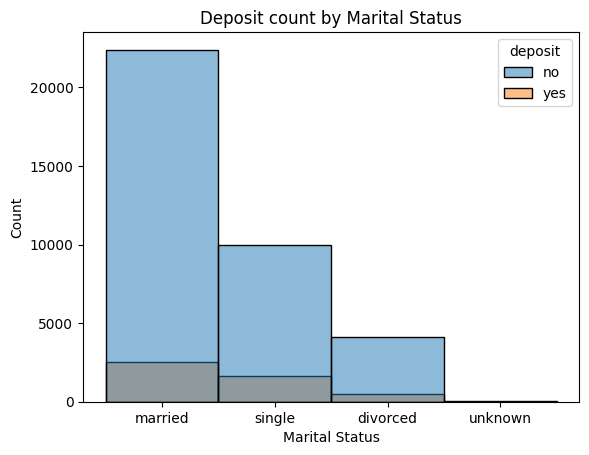

In [5]:
ax = sns.histplot(x ='marital', hue = "deposit", data = df)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_title('Deposit count by Marital Status')

plt.show()

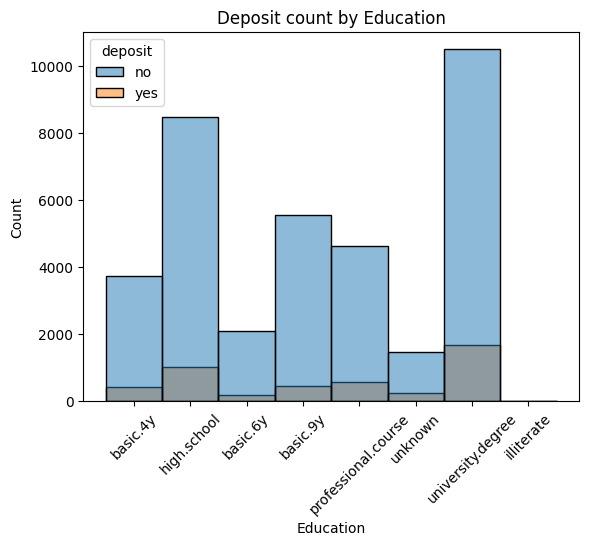

In [6]:
df.rename(columns = {'y':'deposit'}, inplace = True)
ax = sns.histplot(x ='education', hue = "deposit", data = df)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Deposit count by Education')
plt.xticks(rotation=45)

plt.show()

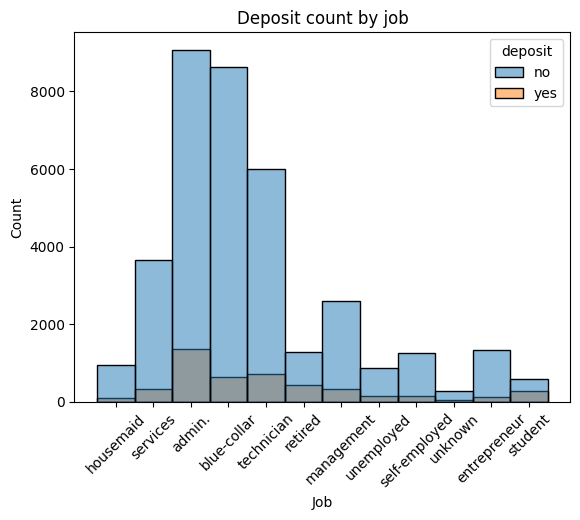

In [7]:
# Bar plot of count of accepted term deposit application by job
ax = sns.histplot(x ='job', hue = "deposit", data = df)

# Adding Title to the Plot
ax.set_title('Deposit count by job')

# Setting the X and Y labels
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [8]:


X = df[['job', 'marital', 'education']]
y = df['deposit']

In [9]:
X.head()

,job,marital,education
0,housemaid,married,basic.4y
1,services,married,high.school
2,services,married,high.school
3,admin.,married,basic.6y
4,services,married,high.school


In [10]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['job', 'marital', 'education']),
                                      remainder='passthrough')

column_trans.fit(X)


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education'])])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [12]:
dtc_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [13]:
dtc = dtc_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
dtc_pred = dtc.predict(X_test)

In [14]:
dtc_accuracy = accuracy_score(y_test, dtc_pred)


In [15]:
logr_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])


In [16]:
logr = logr_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
logr_pred = logr.predict(X_test)

In [17]:
logr_accuracy = accuracy_score(y_test, logr_pred)


In [18]:
knn_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

# Train the classifiers
knn = knn_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
knn_pred = knn.predict(X_test)

# Evaluate Training and Test Scores



In [19]:
knn_accuracy = accuracy_score(y_test, knn_pred)


In [20]:
svm_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC())
])

# Train the classifiers
svm = svm_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
svm_pred = svm.predict(X_test)


In [21]:
svm_accuracy = accuracy_score(y_test, svm_pred)


In [22]:
pd.DataFrame({'Model': ['DecisionTreeClassifier', 'LogisticRegression','KNeighborsClassifier', 'SVM'],
              'Base_model_Accuracy': [dtc_accuracy,logr_accuracy,knn_accuracy,svm_accuracy]})

,Model,Base_model_Accuracy
0,DecisionTreeClassifier,0.887432
1,LogisticRegression,0.887594
2,KNeighborsClassifier,0.887594
3,SVM,0.887675


In [23]:
parameters = {
    'model__penalty' : ['l1','l2'], 
}


gsLR = GridSearchCV(estimator=logr_pipe,
            param_grid=parameters,
            scoring='accuracy',
            cv=10)

gsLR = gsLR.fit(X_train, y_train)
gsLR_predicted = gsLR.predict(X_test)



/Users/ganeriwalg/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ganeriwalg/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ganeriwalg/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/ganeriwalg/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 473, in fit
   

In [24]:
param_grid = {"model__n_neighbors": [1,2,3]}

gsknn = GridSearchCV(knn_pipe, param_grid, cv=10, scoring='accuracy')
gsknn.fit(X_train, y_train)

gsknn_predicted = gsknn.predict(X_test)


In [25]:
params =  {
    'model__min_samples_leaf': [ 2, 3],
    'model__max_depth': [ 2, 3],
    'model__criterion': ['entropy','gini']
}

gsDTC = GridSearchCV(estimator=dtc_pipe,
                     param_grid = params,
                     cv=10,
                     n_jobs=1)


gsDTC = gsDTC.fit(X_train, y_train)
gsDTC_predicted = gsDTC.predict(X_test)


In [26]:
param_grid = {'model__C': [1, 10], 'model__kernel': ['rbf', 'sigmoid']}
gsSVC = GridSearchCV(estimator=svm_pipe,
                     param_grid = param_grid,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=1)

gsSVC.fit(X_train, y_train)
gsSVC_predicted = gsSVC.predict(X_test)




In [28]:
pd.DataFrame({'Model': ['DecisionTreeClassifier', 'LogisticRegression','KNeighborsClassifier', 'SVM'],
              'best_score_with_CV': [gsDTC.best_score_,gsLR.best_score_,gsknn.best_score_,gsSVC.best_score_],
              'Train time': [gsDTC.cv_results_['mean_fit_time'],gsLR.cv_results_['mean_fit_time'],gsknn.cv_results_['mean_fit_time'],gsSVC.cv_results_['mean_fit_time']],
              'Best param':[gsDTC.best_params_,gsLR.best_params_,gsknn.best_params_,gsSVC.best_params_] 
            })


,Model,best_score_with_CV,Train time,Best param
0,DecisionTreeClassifier,0.887239,"[0.03394119739532471, 0.03200442790985107, 0.0...","{'model__criterion': 'entropy', 'model__max_de..."
1,LogisticRegression,0.887205,"[0.014447879791259766, 0.042438292503356935]",{'model__penalty': 'l2'}
2,KNeighborsClassifier,0.880337,"[0.02899479866027832, 0.029509735107421876, 0....",{'model__n_neighbors': 2}
3,SVM,0.887205,"[2.8975263357162477, 4.809007024765014, 3.0504...","{'model__C': 1, 'model__kernel': 'rbf'}"
